<a href="https://colab.research.google.com/github/NancyArmah/COVID19-Online_news-Classification-using-NLP/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## Introduction

From the moment the e-commerce payment systems came to existence, there have always been people who will find new ways to access someone’s finances illegally. This has become a major problem in the modern era, as all transactions can easily be completed online by only entering your credit card information.

Payment card fraud is a major challenge for businesses, payment card issuers and tranactional service companies. The losses from payment card fraud reached 28.6 billion worldwide in 2019 according to [Nilson Report Data](https://nilsonreport.com/content_promo.php?id_promo=16). United States alone is responsible for more than a third of the total global loss, making it the most card fraud prone country in the world. 

The corona virus pandemic has also fueled an explosive growth in card fraud activity because many consumers and retailers decided it was not worth the risk and pivoted to using their bank cards and phones to make everyday purchases. In the UK, card payments were 75.3% higher in early April 2020 compared with a year earlier, while contactless payment limits also rose to $100, making the switch to contactless even more appealing.

Unfortunately, this rapid change was overshadowed by increased levels of fraud. It impacts consumers, merchants and issuers alike. Its economic cost goes far beyond the cost of illegally purchased merchandise because businesses often spend millions to protect themselves from fraud. Big businesses can absorb some amount of losses but if a small one-shop business or a restaurant all of a sudden has a $10,000 loss, that could be the difference between making payroll and not making payroll for that company.

It should also be noted that fraud detection is a cat and mouse game, where fraudulent patterns change over time. As technology evolves, both in terms of fraud prevention and ease of use of payment systems, so do fraudster techniques. They adapt by moving from the old (and by now fixed) targets to the vulnerability of the new technologies.

Credit card fraud detection (CCFD) is like looking for needles in a haystack. It requires finding, out of millions of daily transactions, which ones are fraudulent. Due to the ever-increasing amount of data, it is now almost impossible for a human specialist to detect meaningful patterns from transaction data. For this reason, the use of machine learning techniques is now widespread in the field of fraud detection, where information extraction from large datasets is required.

Credit Card Fraud Detection with Machine Learning is a process of data investigation and the development of a model that will provide the best results in revealing and preventing fraudulent transactions. This is achieved through bringing together all meaningful features of card users’ transactions. The information is then run through a subtly trained model that finds patterns and rules so that it can classify whether a transaction is fraudulent or is legitimate. 



## Objective


*   Train a Machine Learning Model with historic data to learn patterns behind fraudulent behavior to enable the model filter out fraudulent transactions and stop them from occurring in real-time.




## Data

Simulated credit card transaction dataset from [Kaggle](https://www.kaggle.com/datasets/kartik2112/fraud-detection) containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

This was generated using [Sparkov Data Generation | Github](https://github.com/namebrandon/Sparkov_Data_Generation) tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were then combined and converted into a standard format.

## Install and Import Packages

In [1]:
!pip install haversine

In [17]:
import numpy as np 
import pandas as pd

import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime, date
from pylab import rcParams
import seaborn as sns
import haversine as hs
import warnings
warnings.filterwarnings('ignore')

# import libraries needed for this step
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score, roc_auc_score, classification_report
from collections import Counter

import sklearn.neighbors
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
import statsmodels.api as sm 
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import Data

In [18]:
train_df=pd.read_csv('/content/drive/MyDrive/archive (2)/fraudTrain.csv')
test_df=pd.read_csv('/content/drive/MyDrive/archive (2)/fraudTest.csv')

In [5]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
# drop the unnamed column
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#check the sahpe of the datasets
print(test_df.shape)
print(train_df.shape)

(555719, 22)
(1296675, 22)


In [ ]:
#check for nulls
test_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
train_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
# Check for imbalance on target variable in the test dataset
test_df.is_fraud.value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

In [ ]:
# Check for imbalance on target variable in the train dataset
train_df.is_fraud.value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

The datasets are highly unbalanced, the positive class (frauds) account for less than a percentage in both. Most of the transactions are non-fraud which is obvious. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud.

The two dataframes are concatenated into one dataframe to enable balancing and respliting.

In [19]:
df = pd.concat([train_df,test_df])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.shape

(1852394, 22)

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1852394, 22)

In [ ]:
non_fraud= df[df['is_fraud'] == 0]
fraud = df[df['is_fraud'] == 1]

print('Non_fraud:', len(non_fraud))
print('Fraud:', len(fraud))

Non_fraud: 1842743
Fraud: 9651


In [ ]:
df.is_fraud.value_counts(normalize=True)*100

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

In [ ]:
#Total Transaction amount
print('Non_fraud: ',df['amt'].loc[df['is_fraud'] == 0].sum())
print('Fraud: ',df['amt'].loc[df['is_fraud'] == 1].sum())

Non_fraud:  124663918.71999995
Fraud:  5121413.290000001


Latitudes and Longitues are converted using the Haversine formula into distances in kilometers.

In [20]:
# Function to calculate the distance between two adress
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    new_lon = lon2 - lon1
    new_lat = lat2 - lat1

    haver_formula = np.sin(new_lat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(new_lon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

Modifying Datatypes for time and date columns

In [21]:
# clean date of DOB and trans_date_trans_time
dates = ['trans_date_trans_time','dob']
for x in dates:
    df[x] = pd.to_datetime(df[x])

In [22]:
# get hours from the transaction
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
# days when the transaction occured 
df['day_of_week'] =df['trans_date_trans_time'].dt.day_name()
# period when the transaction occured
df['year_month'] =df['trans_date_trans_time'].dt.to_period('M')
# the age of the client when the transaction occured
df['age'] = (np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y')))
# get the full name 
df['Full_Name'] = df['first'] +' ' + df['last']
df.drop(['first','last'], axis=1, inplace=True)
# create the column where the if the population is less than 25% to be rural, 25-50% ssemi-urban, and more than 50% urban
df['residence'] = pd.qcut(df.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])

# concanate the lat and longitude of client into one column and the same for the merchant location
df['lat_long'] = tuple(zip(*df[['lat','long']].values.T))
df['merch_ad'] = tuple(zip(*df[['merch_lat','merch_long']].values.T))

# create the distance column
df['distance'] = haversine_vectorize(df['long'],df['lat'],df['merch_long'],df['merch_lat'])

# EDA

Visulalize the class imbalance

Text(0.5, 1.0, 'Class Distributions \n (0: Non Fraud || 1: Fraud)')

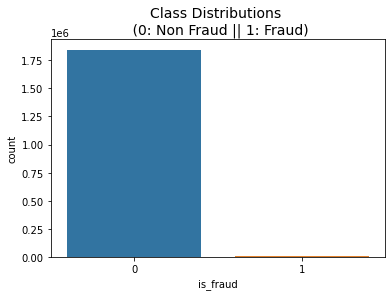

In [ ]:
sns.countplot('is_fraud', data=df)
plt.title('Class Distributions \n (0: Non Fraud || 1: Fraud)', fontsize=14)

We can visually see how heavily imbalanced our data set is.

## Bivariate Analysis

Bar graphs are used to compare things between different groups or to track changes over time. However, bar graphs are best when the changes are larger.

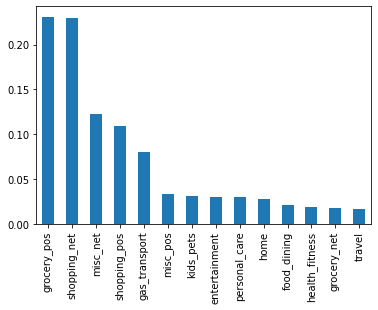

In [ ]:
#Fraud v Category
df[(df['is_fraud']==1)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

From the plot above, the top categories which are prone to fraud are grocery_pos where groceries are paid for using a pos machine, shopping_net, misc_net, shopping_pos and gas transport with grocery pos being the highest.

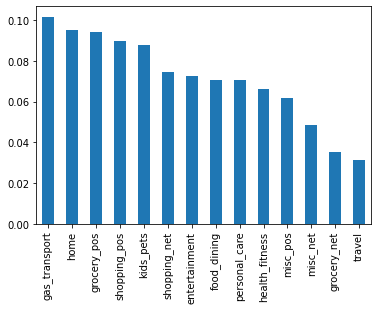

In [ ]:
#Non Fraud v category
df[(df['is_fraud']==0)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

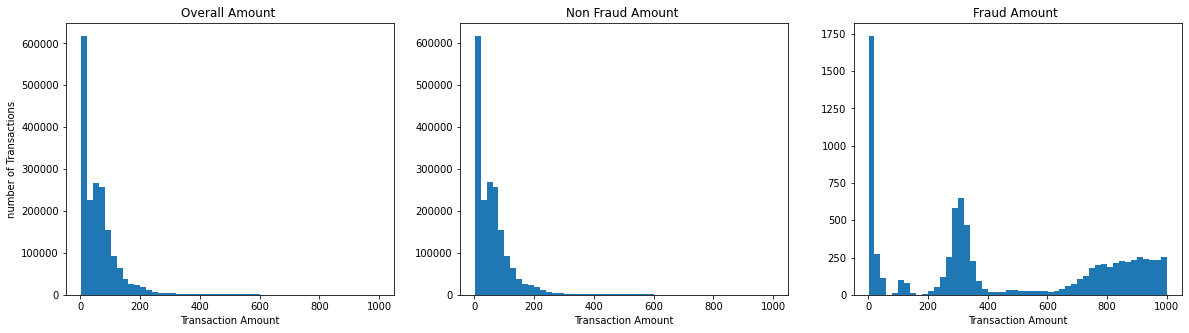

In [ ]:
#Histogram of Fraudulent and Non Fraudulent Transactions v Amount

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1000]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1000)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1000)]['amt'], bins=50)

ax[0].set_title('Overall Amount ')
ax[1].set_title('Non Fraud Amount ')
ax[2].set_title('Fraud Amount ')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

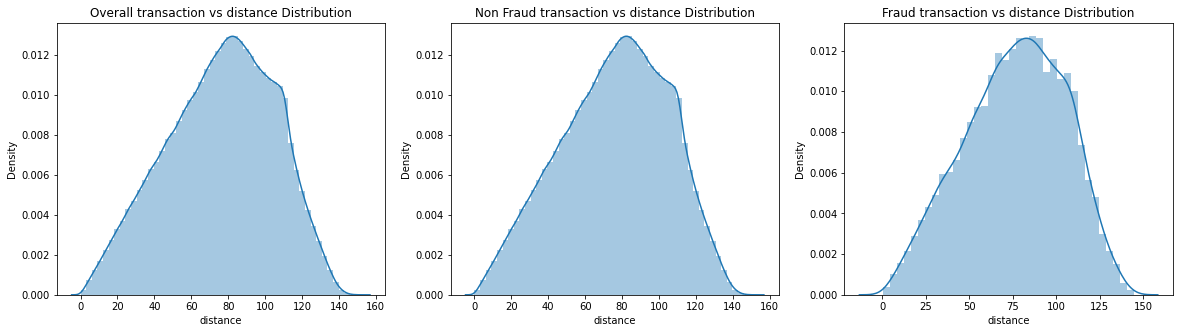

In [ ]:
#Distribution of Fraudulent and Non Fraudulent Transactions v Distance


fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(df['distance'], ax= ax[0])
sns.distplot(df[(df['is_fraud']==0)].distance, ax= ax[1]) 
sns.distplot(df[(df['is_fraud']==1)].distance, ax= ax[2])

ax[0].set_title('Overall transaction vs distance Distribution')
ax[1].set_title('Non Fraud transaction vs distance Distribution')
ax[2].set_title('Fraud transaction vs distance Distribution')

plt.show()

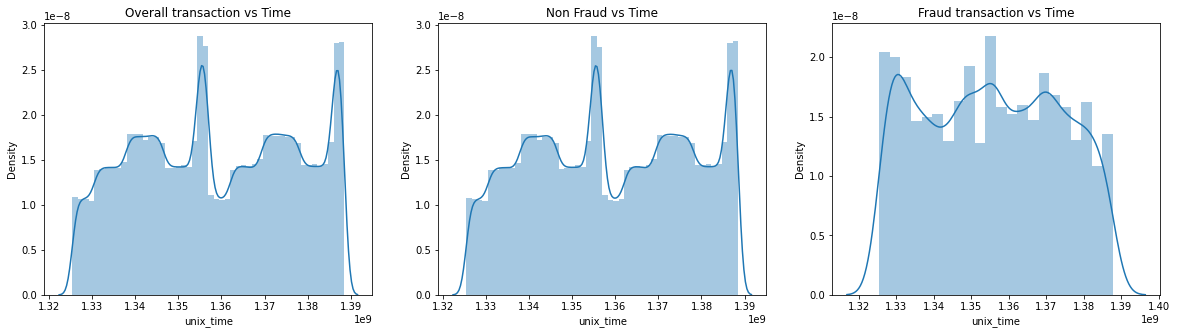

In [ ]:
#Distrbution of Fraudulent and Non Fraudulent Transactions v Time

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(df['unix_time'], ax= ax[0])
sns.distplot(df[(df['is_fraud']==0)].unix_time, ax= ax[1])
sns.distplot(df[(df['is_fraud']==1)].unix_time, ax= ax[2])
ax[0].set_title('Overall transaction vs Time')
ax[1].set_title('Non Fraud vs Time')
ax[2].set_title('Fraud transaction vs Time')

plt.show()

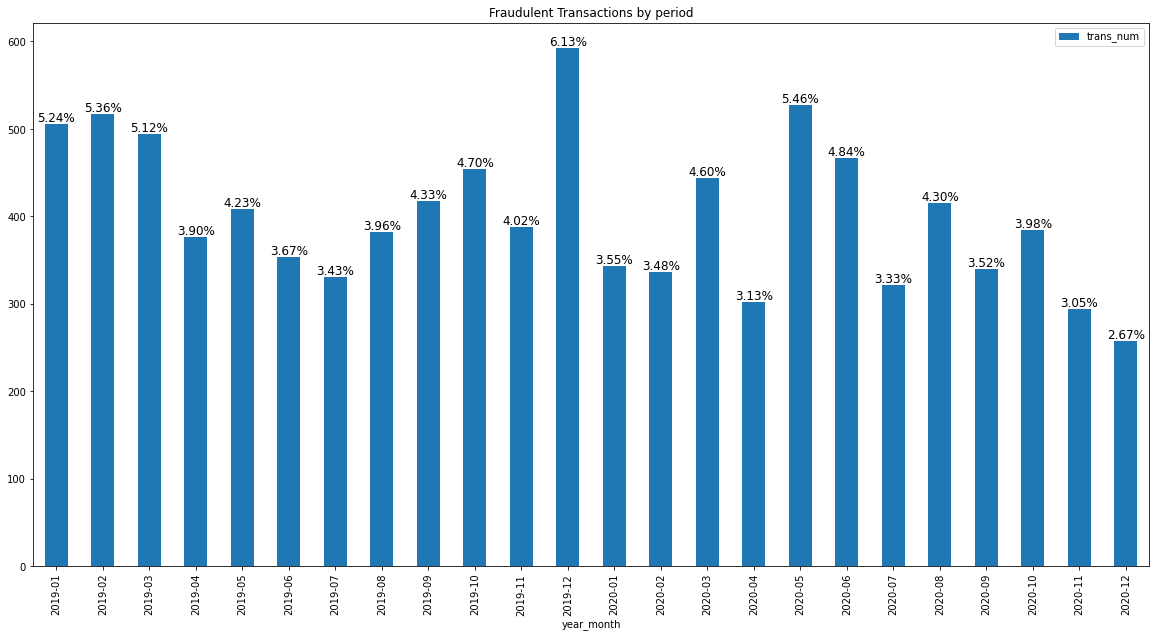

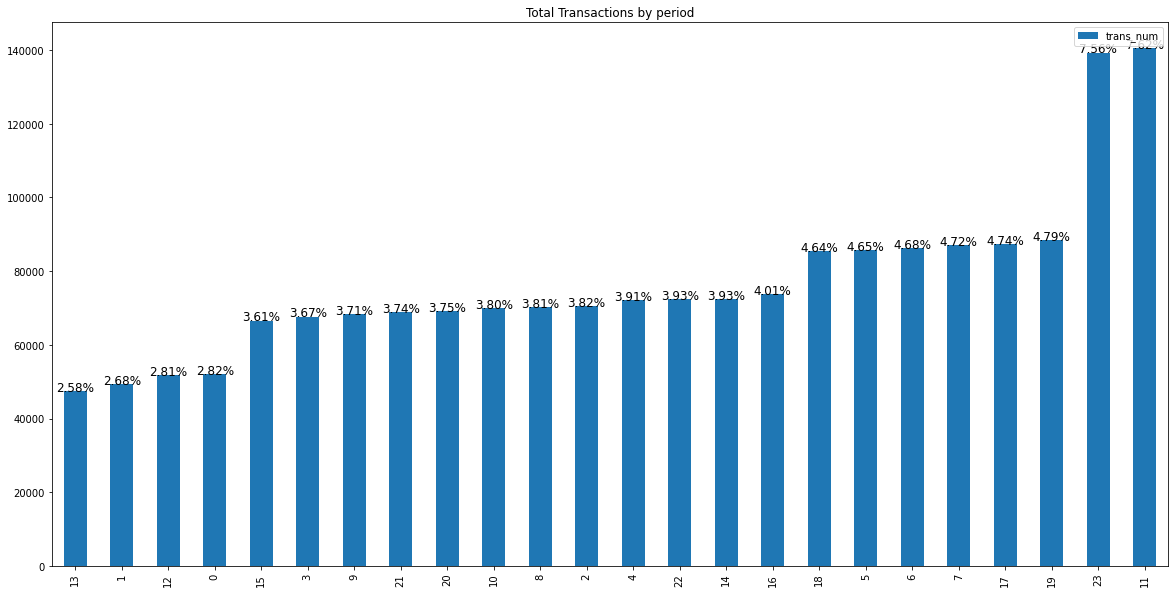

In [ ]:
#Barplot of Fraudulent and Total tansactions by period

fraud = df[(df['is_fraud']==1)] # fraud df
not_fraud = df[(df['is_fraud']==0)] # non fraud dataframe

ax = fraud.groupby(fraud['year_month'])['trans_num'].nunique().reset_index().set_index('year_month').plot.bar(figsize=(20,10))
ax1 = not_fraud.groupby(not_fraud['year_month'])['trans_num'].nunique().reset_index().sort_values(by=['trans_num']).plot.bar(figsize=(20,10))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=12)
    
for t in ax1.patches:
    height = t.get_height()
    ax1.text(t.get_x()+t.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(not_fraud)*100),
            ha="center", fontsize=12) 
ax.set_title('Fraudulent Transactions by period')
ax1.set_title('Total Transactions by period')
plt.show()

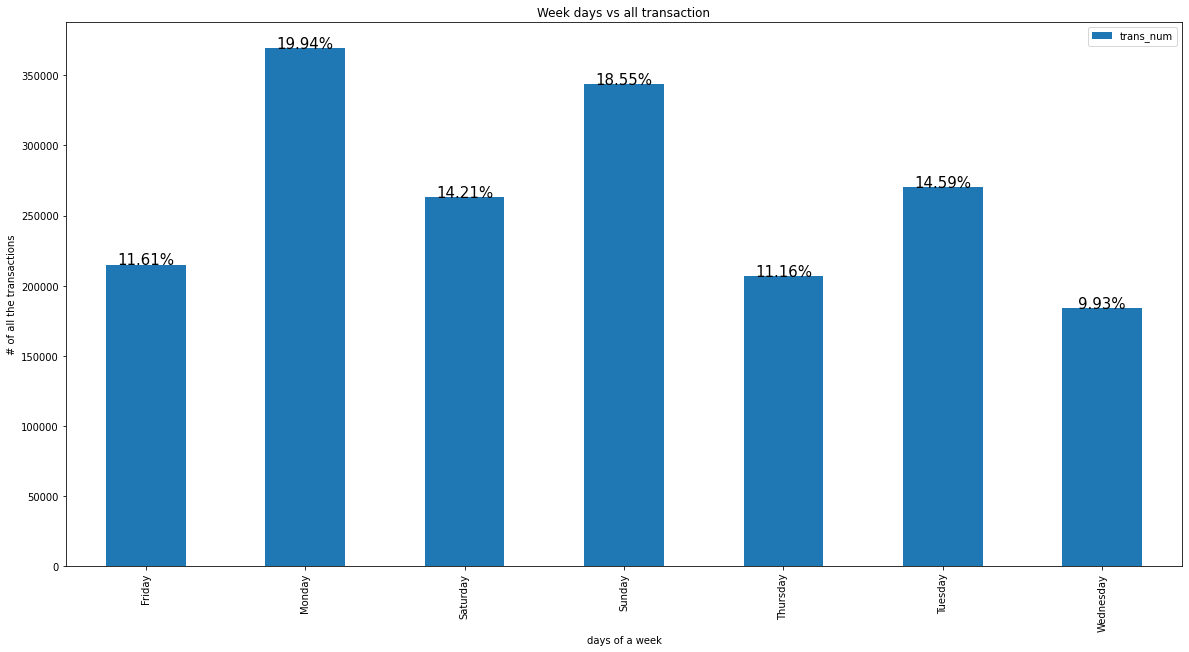

In [ ]:
#bar plot of Total transactions by week day

ax = df.groupby(df['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs all transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=15)
plt.show()

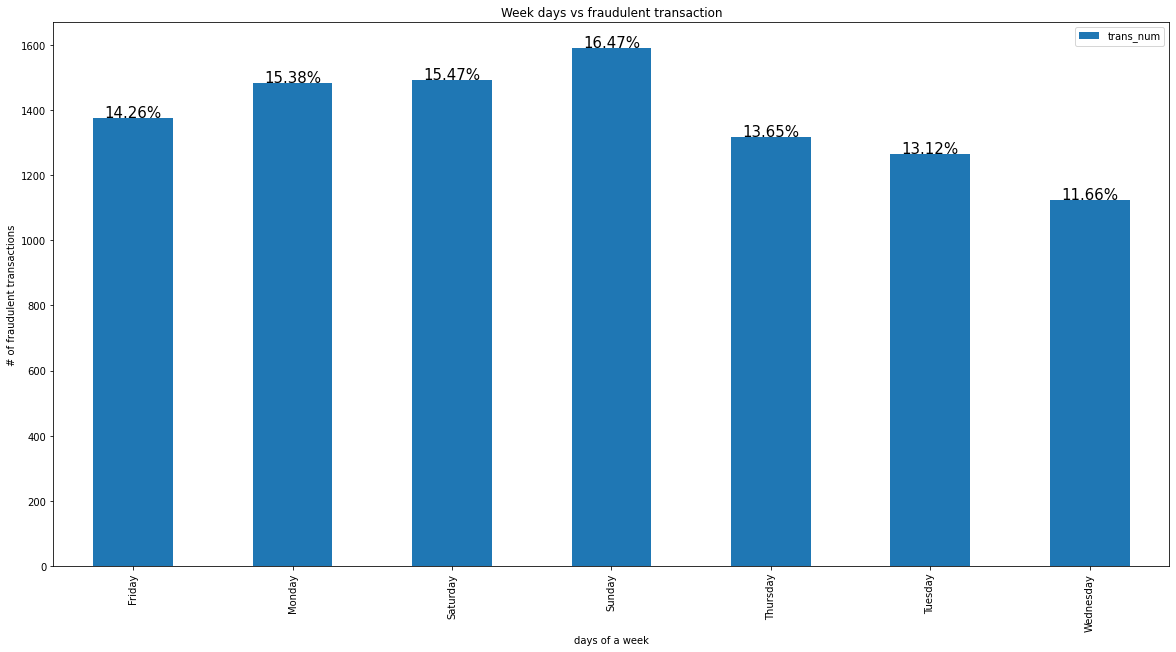

In [ ]:
#bar plot of Fraudulent transactions by week day

ax = fraud.groupby(fraud['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of fraudulent transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs fraudulent transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
plt.show()

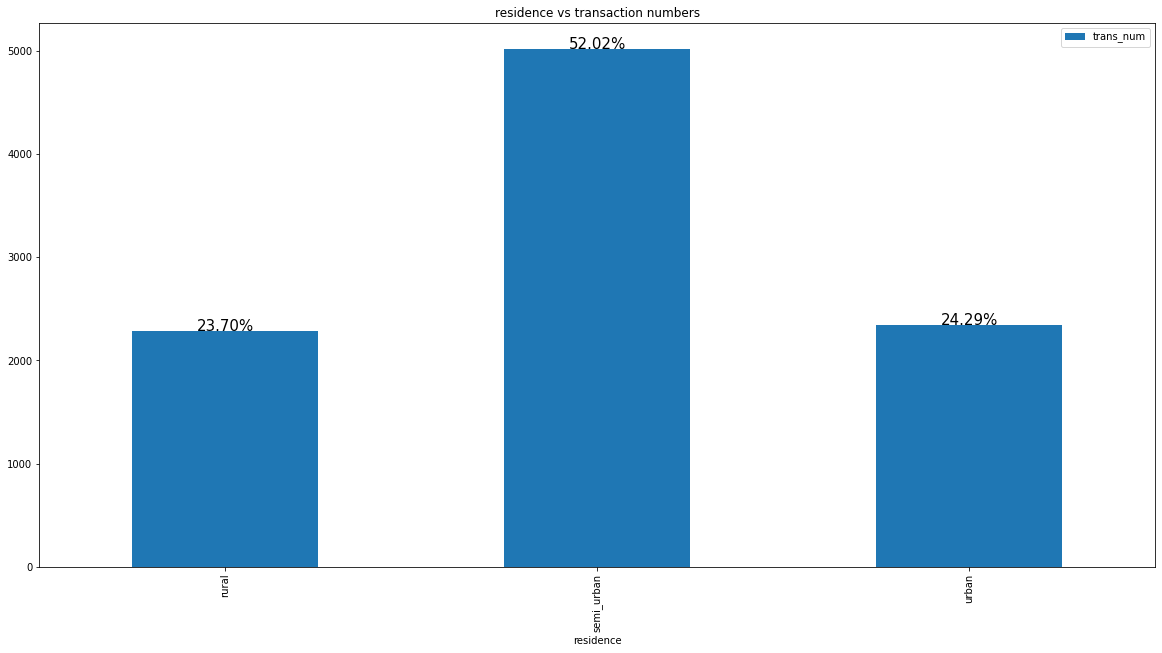

In [ ]:
#transactions grouped by area of residence

ax = fraud.groupby(fraud['residence'])['trans_num'].nunique().reset_index().set_index('residence').plot.bar(figsize=(20,10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
ax.set_title('residence vs transaction numbers')
plt.show()

Overall, it is observed that;

*   the POS and net purchases have the highest fraudulent attacks compared to the other categories.

*   There are not a big difference on the distribution of the fraudulent transaction and non fraudulent transacation.

*   From period transaction, there were more fraudulent transaction in 2019 as compared to 2020.

*   In a week, there were more fraudulent transaction on monday

*   In relation to the area, more fraudulent transactions were recorded in the semi-urban areas as compared to the others.

##Multivariate Analysis

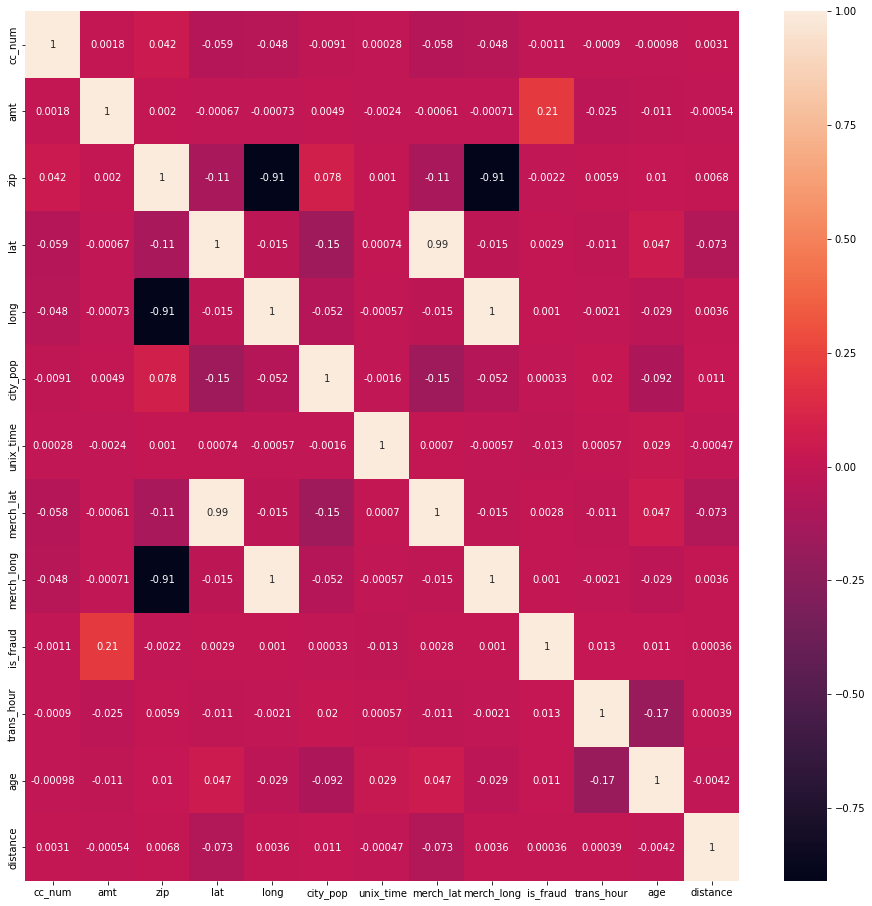

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

There are a high correlation between location (longititude and latitude of the clients and merchant location.

In [ ]:
import plotly.express as px 

df2_fraud = df[df['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="state",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
dfm_fraud = df[df['is_fraud'] == 1]

fig = px.scatter_mapbox(dfm_fraud, lat="merch_lat", lon="merch_long", hover_name="state",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

What we can observe from the above plots are that more fraudulent transaction occurs in the east of the united states, where there were more merchant as well.

#Data Preprocessing

In [23]:
dframe = df.copy()
dframe = dframe.drop(['Unnamed: 0','cc_num','trans_date_trans_time','Full_Name', 'merchant','trans_num','street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop','dob', 'merch_lat', 'merch_long','lat_long',
       'merch_ad','job','year_month'],axis=1)

In [24]:
# creating a dummy variable for ome of the categoorical variables and drop the first ones
dummy_var1 = pd.get_dummies(dframe[['category', 'day_of_week', 'gender', 'residence']], drop_first= True)
# adding the resultss to the master dataframe
dframe = pd.concat([dframe, dummy_var1], axis=1)
#dropping the repeated variables
dframe = dframe.drop(['category', 'day_of_week', 'gender', 'residence'],1)

In [25]:
from sklearn.preprocessing import RobustScaler
# select columns to scale 
to_scale = [col for col in dframe.columns if dframe[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(dframe[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    dframe[col] = scaled[col]

In [26]:
new_df = dframe.copy()

In [27]:
new_df

,amt,unix_time,is_fraud,trans_hour,age,distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,category_travel,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,gender_M,residence_semi_urban,residence_urban
0,-0.578274,-1.004709,0,-1.166667,-0.541667,0.008826,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0.813776,-1.004709,0,-1.166667,-0.125000,-1.111482,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2.350395,-1.004708,0,-1.166667,0.541667,0.694377,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,-0.033351,-1.004708,0,-1.166667,0.333333,0.404193,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
4,-0.074735,-1.004704,0,-1.166667,-0.458333,-0.015273,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2.158045,-0.354585,0,-0.166667,-1.000000,0.343228,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
555715,0.747890,-0.354584,0,-0.166667,-0.250000,-1.034550,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
555716,0.544378,-0.354584,0,-0.166667,-0.333333,0.289273,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
555717,-0.545059,-0.354584,0,-0.166667,0.416667,-0.012054,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


#Modeling

In [28]:
X = new_df.drop(['is_fraud'],axis=1) 
y = new_df['is_fraud'] #target variable

In [29]:
#split the dataset into training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important. One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

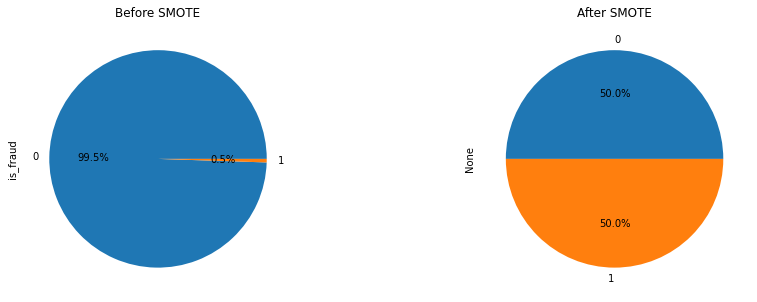

In [30]:
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

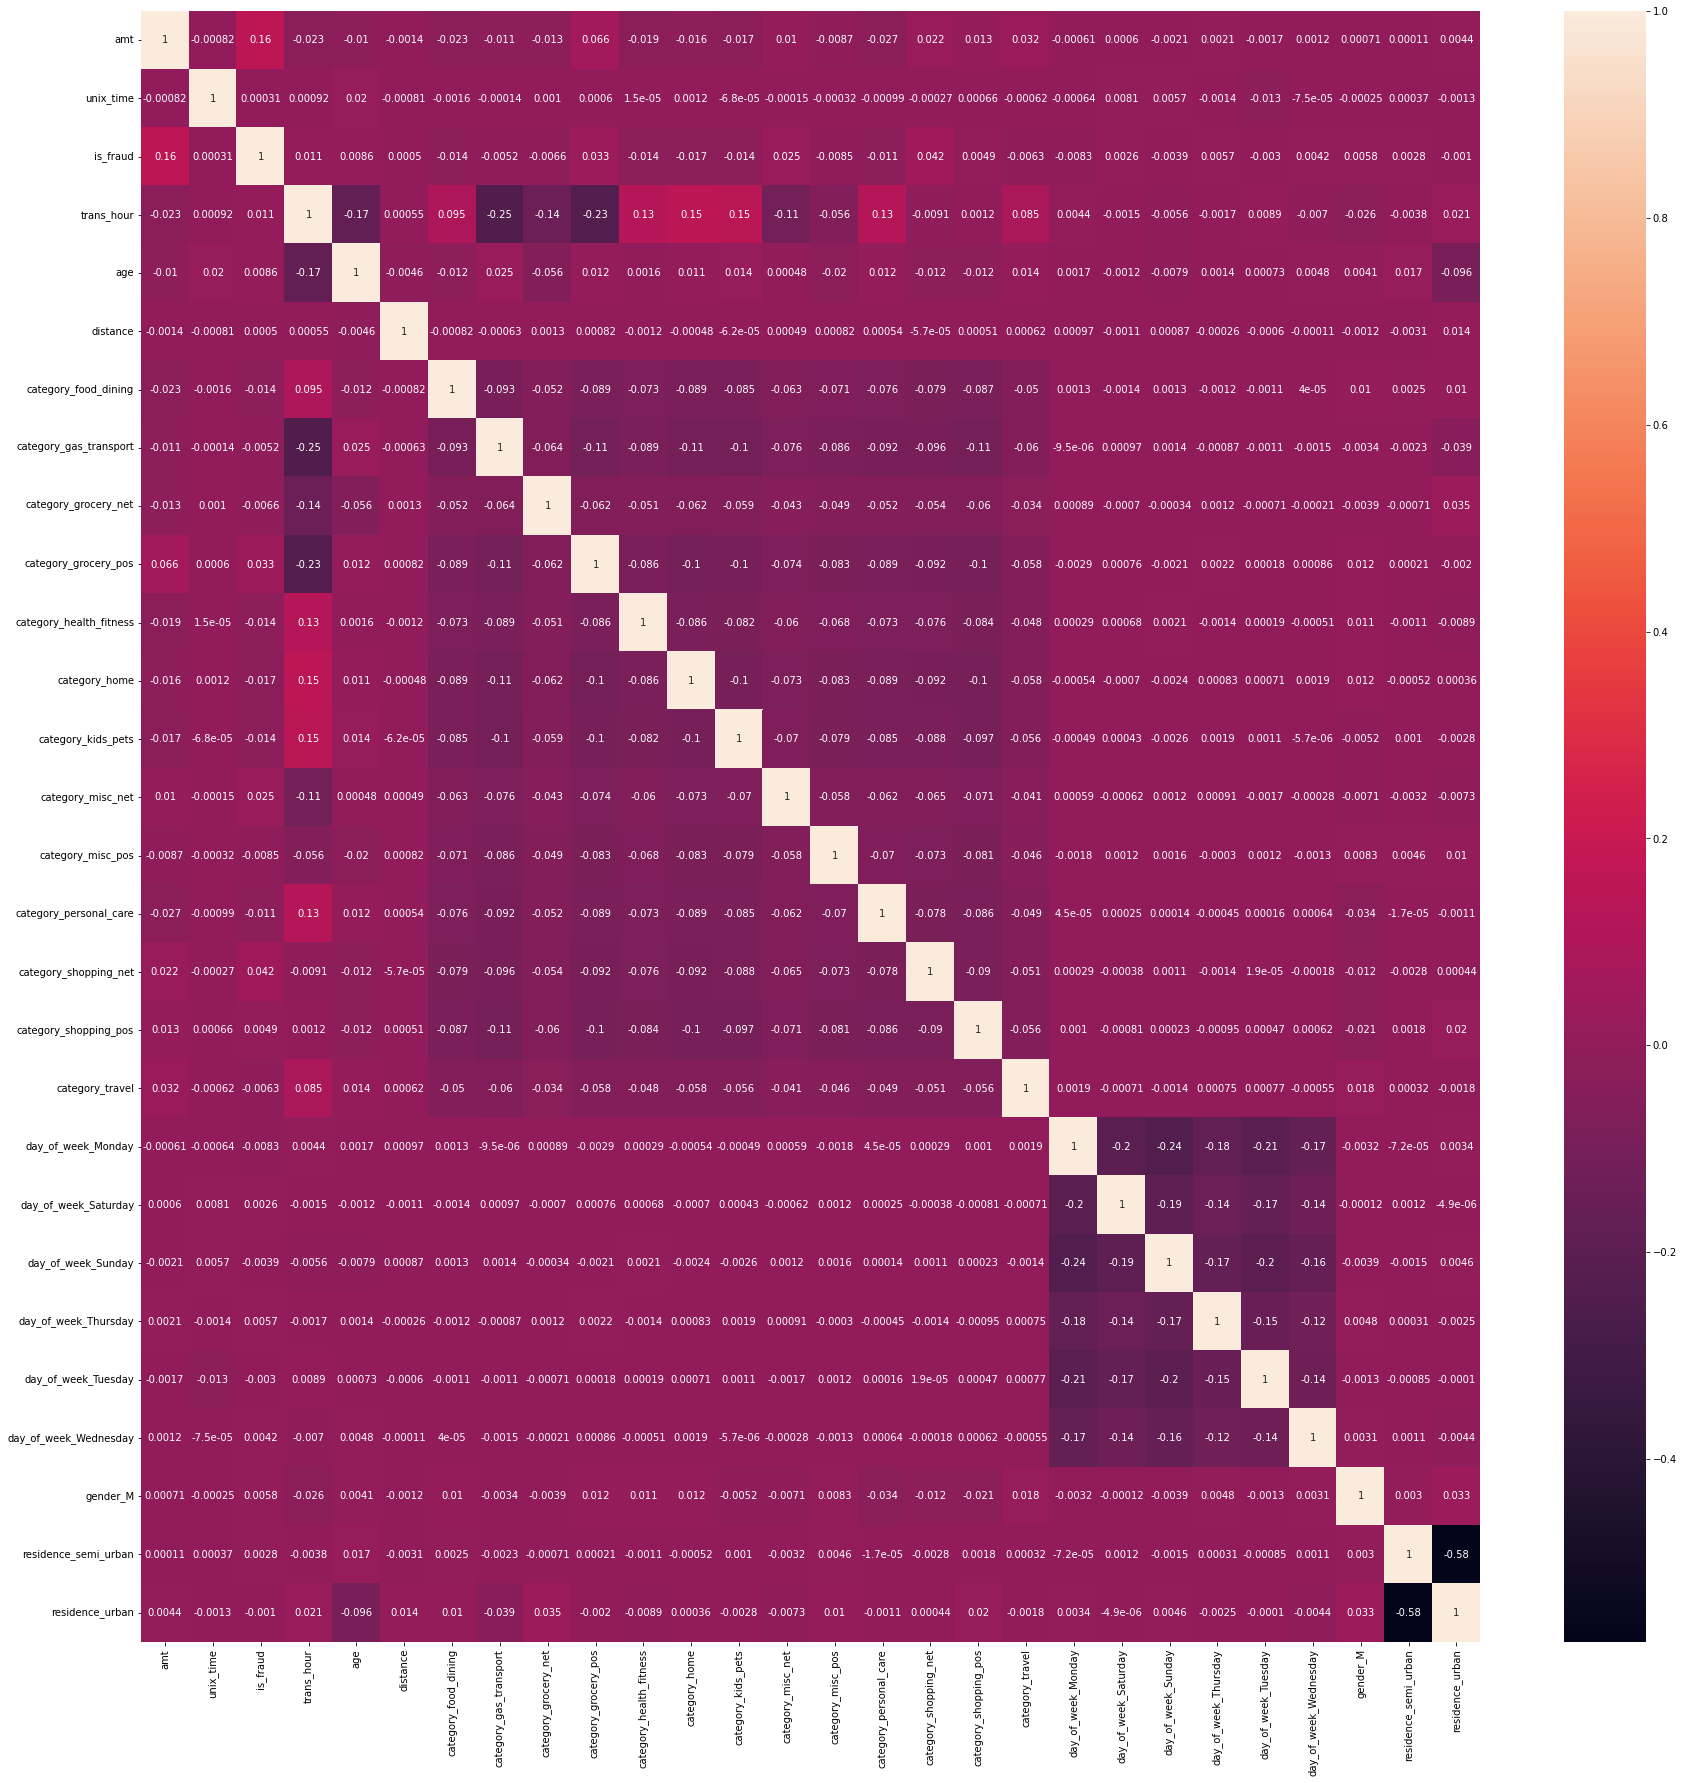

In [ ]:
# let's see the correlation matrix
plt.figure(figsize= (30, 30))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

#Supervised Learning Models

Supervised ML methods use labeled data samples, so the system will then predict these labels in future unseen before data.

# Random Forest

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_new, y_train_new)
pred_train = logreg.predict(X_train_new)

In [32]:
pred_test = logreg.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[310741  57785]
 [   648   1305]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    368526
           1       0.02      0.67      0.04      1953

    accuracy                           0.84    370479
   macro avg       0.51      0.76      0.48    370479
weighted avg       0.99      0.84      0.91    370479



# Decision Tree

In [ ]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_new, y_train_new)
pred_train = dt_clf.predict(X_train_new)

print(confusion_matrix(y_train_new, pred_train))
print(classification_report(y_train_new, pred_train))

[[1413816   60401]
 [  60444 1413773]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96   1474217
           1       0.96      0.96      0.96   1474217

    accuracy                           0.96   2948434
   macro avg       0.96      0.96      0.96   2948434
weighted avg       0.96      0.96      0.96   2948434



In [ ]:
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[351986  16540]
 [   515   1438]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    368526
           1       0.08      0.74      0.14      1953

    accuracy                           0.95    370479
   macro avg       0.54      0.85      0.56    370479
weighted avg       0.99      0.95      0.97    370479



# XGBoost

In [ ]:
#Building XG Boost Model

xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, verbose = 1)
xbt_model.fit(X_train_new, y_train_new)

pred_train = xbt_model.predict(X_train_new)
print(confusion_matrix(y_train_new, pred_train))
print(classification_report(y_train_new, pred_train))

[[1405601   68616]
 [ 253510 1220707]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90   1474217
           1       0.95      0.83      0.88   1474217

    accuracy                           0.89   2948434
   macro avg       0.90      0.89      0.89   2948434
weighted avg       0.90      0.89      0.89   2948434



In [68]:
pred_test = xbt_model.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[351411  17115]
 [   512   1441]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    368526
           1       0.08      0.74      0.14      1953

    accuracy                           0.95    370479
   macro avg       0.54      0.85      0.56    370479
weighted avg       0.99      0.95      0.97    370479



When dealing with imbalanced data, accuracy cannot be used as a measure for a good model, instead we would use the recall score.ie how well is our model able to classify the fraudulent transactions.

From the above models Decision Tree and XGBoost performed better in relation to the recall score on the test set.

# Challenges

Some challenges faced during the project are;

* Lack of public datasets: For obvious confidentiality reasons, real-world credit card transactions cannot be publicly shared. There exists only one publicly shared dataset, which was made available on Kaggle

* Class imbalance: Transaction data contain much more legitimate than fraudulent transactions: The percentage of fraudulent transactions in a real-world dataset is typically well under 1%. Learning from imbalanced data is a difficult task since most learning algorithms do not handle well large differences between classes. 

* Categorical features: Transactional data typically contain numerous categorical features, such as the ID of a customer, a terminal, the card type, and so on. Categorical features are not well handled by machine learning algorithms and must be transformed into numerical features.

# Future Work

* Train a more models to get one that is able to balance between precision and recall score
* Try other sampling techniques
* Include deep learning models